# Alemada County 2011 Ethnicity Analysis | Understanding how BART's Transit Oriented Development projects have changed regional ethnic demographics

 Hi, welcome to a quick ethnicity exploration within Alameda Country for the year 2011. We select 2011 as it was before many of the recetn TOD projects were completed and opened to public. THis along with the 2019 analysis by Nicole should give you a picture of how ethnic compositon of Alameda Country changed with the introduction of the TOD projects. 

## Importing Libraries

We will primarily use geospatial data for the analysis which calls for the geopandas library. We also do some non-geospatial data wrangling. Since the primary purpose of this project is to spatially analyse the data, we bring in the contextily library and matplotlib to improve the aesthetics of the analysis. 

In [1]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Ethnicity Data for Alameda county, which is the locus of our analysis has, for the year 2011 is obtained directly fron census database. Following is the code to read the dataframe. 

In [2]:
g2011 = gpd.read_file('Data/data2.csv')

Let us get a look at the dimentions of the database to help inform our work

In [3]:
g2011.shape

(362, 46)

We are interested to see what data is contained within the data set. 

In [4]:
g2011.head()

,B03002_001E,B03002_001M,B03002_002E,B03002_002M,B03002_003E,B03002_003M,B03002_004E,B03002_004M,B03002_005E,B03002_005M,...,B03002_019E,B03002_019M,B03002_020E,B03002_020M,B03002_021E,B03002_021M,GEO_ID,GEOID,NAME,geometry
0,Estimate!!Total,Margin of Error!!Total,Estimate!!Total!!Not Hispanic or Latino,Margin of Error!!Total!!Not Hispanic or Latino,Estimate!!Total!!Not Hispanic or Latino!!White...,Margin of Error!!Total!!Not Hispanic or Latino...,Estimate!!Total!!Not Hispanic or Latino!!Black...,Margin of Error!!Total!!Not Hispanic or Latino...,Estimate!!Total!!Not Hispanic or Latino!!Ameri...,Margin of Error!!Total!!Not Hispanic or Latino...,...,Estimate!!Total!!Hispanic or Latino!!Two or mo...,Margin of Error!!Total!!Hispanic or Latino!!Tw...,Estimate!!Total!!Hispanic or Latino!!Two or mo...,Margin of Error!!Total!!Hispanic or Latino!!Tw...,Estimate!!Total!!Hispanic or Latino!!Two or mo...,Margin of Error!!Total!!Hispanic or Latino!!Tw...,id,id2,Geographic Area Name,None
1,2451,194,2366,196,1894,235,124,88,0,95,...,17,20,7,12,10,17,1400000US06001400100,06001400100,"Census Tract 4001, Alameda County, California",None
2,2103,142,1914,169,1470,214,72,49,13,21,...,95,124,85,125,10,15,1400000US06001400200,06001400200,"Census Tract 4002, Alameda County, California",None
3,5088,370,4627,350,3542,319,584,133,39,49,...,23,32,4,12,19,30,1400000US06001400300,06001400300,"Census Tract 4003, Alameda County, California",None
4,3943,427,3493,435,2624,420,339,84,29,45,...,8,15,0,95,8,15,1400000US06001400400,06001400400,"Census Tract 4004, Alameda County, California",None


Oops, the data is not exactly in form we need it to be.
1. First, The first row [0] contains alternative names for the columns, and not original data. We will need to remove that.
2. Second, We only need a few of these columns to work with.  
3. Third, the dataframe has a geometry column without values. 

Let us tackle the first issue first. We can do it with the following bit of code. 


In [5]:
g2011 = g2011.drop([0])

In [6]:
g2011.head()

,B03002_001E,B03002_001M,B03002_002E,B03002_002M,B03002_003E,B03002_003M,B03002_004E,B03002_004M,B03002_005E,B03002_005M,...,B03002_019E,B03002_019M,B03002_020E,B03002_020M,B03002_021E,B03002_021M,GEO_ID,GEOID,NAME,geometry
1,2451,194,2366,196,1894,235,124,88,0,95,...,17,20,7,12,10,17,1400000US06001400100,06001400100,"Census Tract 4001, Alameda County, California",None
2,2103,142,1914,169,1470,214,72,49,13,21,...,95,124,85,125,10,15,1400000US06001400200,06001400200,"Census Tract 4002, Alameda County, California",None
3,5088,370,4627,350,3542,319,584,133,39,49,...,23,32,4,12,19,30,1400000US06001400300,06001400300,"Census Tract 4003, Alameda County, California",None
4,3943,427,3493,435,2624,420,339,84,29,45,...,8,15,0,95,8,15,1400000US06001400400,06001400400,"Census Tract 4004, Alameda County, California",None
5,3481,319,3120,342,1668,204,1066,285,11,18,...,54,50,9,15,45,48,1400000US06001400500,06001400500,"Census Tract 4005, Alameda County, California",None


Note that the dataframe no loner has that annoying first row. However second issue still remains.

Now to renaming columns and removing uneccesary ones let us first get to know which columns are present.

In [7]:
list(g2011)

['B03002_001E',
 'B03002_001M',
 'B03002_002E',
 'B03002_002M',
 'B03002_003E',
 'B03002_003M',
 'B03002_004E',
 'B03002_004M',
 'B03002_005E',
 'B03002_005M',
 'B03002_006E',
 'B03002_006M',
 'B03002_007E',
 'B03002_007M',
 'B03002_008E',
 'B03002_008M',
 'B03002_009E',
 'B03002_009M',
 'B03002_010E',
 'B03002_010M',
 'B03002_011E',
 'B03002_011M',
 'B03002_012E',
 'B03002_012M',
 'B03002_013E',
 'B03002_013M',
 'B03002_014E',
 'B03002_014M',
 'B03002_015E',
 'B03002_015M',
 'B03002_016E',
 'B03002_016M',
 'B03002_017E',
 'B03002_017M',
 'B03002_018E',
 'B03002_018M',
 'B03002_019E',
 'B03002_019M',
 'B03002_020E',
 'B03002_020M',
 'B03002_021E',
 'B03002_021M',
 'GEO_ID',
 'GEOID',
 'NAME',
 'geometry']

Note the M and E at the end of the names. E indictted the actual estimate, which is what we want to retain. M is the margin of error, not signficiant to our analysis now. 

We must also remove the geometry column as it serves no purpose currently. Plus, this causes trouble in the next step.

To clean up the data, we first define a new dataframe that will contain the columns we will retain. 

In [8]:
to_keep = ['B03002_001E',
 'B03002_002E',
 'B03002_003E',
 'B03002_004E',
 'B03002_005E',
 'B03002_006E',
 'B03002_007E',
 'B03002_008E',
 'B03002_009E',
 'B03002_012E',
 'GEOID',
 'NAME']

Now we will create a new  dataframe g2011vs that contains only the new variables. New dataframe is prefereed insteadof writing over the previous one inorder to avoid mistakes when we run codes out of order. 

In [9]:
g2011v2=g2011[to_keep]

Now, let us check how big the dataframe is!

In [10]:
g2011v2.shape

(361, 12)

That is a signficant reduction. We have gone down from 46 to 12 columns, while the number of rows has remained the same. 

Now let us rename the columns to something that can be easily understood. Census provides a metadata folder that can be used to rename the fields. For the purpose of speed (as someone new to python), I worked with the metadata csv on to split columns and generate the names. 

We now rename the columns with the following bit of code

In [11]:
g2011v2.columns = [
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'GEOID',
 'NAME',]

Let us check if the renaming worked

In [12]:
list(g2011v2)

['Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'GEOID',
 'NAME']

In [13]:
g2011v2.head()

,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,GEOID,NAME
1,2451,2366,1894,124,0,228,16,0,104,85,06001400100,"Census Tract 4001, Alameda County, California"
2,2103,1914,1470,72,13,232,0,10,117,189,06001400200,"Census Tract 4002, Alameda County, California"
3,5088,4627,3542,584,39,291,0,0,171,461,06001400300,"Census Tract 4003, Alameda County, California"
4,3943,3493,2624,339,29,158,0,65,278,450,06001400400,"Census Tract 4004, Alameda County, California"
5,3481,3120,1668,1066,11,186,0,14,175,361,06001400500,"Census Tract 4005, Alameda County, California"


Yes it did. Now to tackle the lack of geometry column.

From the dataframe we see that it has no geometry data,  inorder to do any spatial analysis, we will need to find geometry data that can be merge with this data set. If you looked closely, you might see two geoid columns in the first form of data. The GEO_ID is the original column, and GEOID is a column manually created via a mid() in EXCEL. The shapefile dataframe (which we will import in a while) has GEOID which is a FIPS code begining with '06', and not '14'. Now that we have a column with same name and data values that match, we can merge the two data sets with the following code.

Census provides spatial data at the level of census tracts for all years. We will use the 2011 data from this website. https://www.census.gov/cgi-bin/geo/shapefiles/index.php.

We downloaded census tract level data for California. 

In [14]:
geodata = gpd.read_file('Data/Geodata/tl_2011_06_tract.shp')

We have the data! Now let us have a look at it

In [15]:
geodata.shape

(8057, 13)

In [16]:
geodata.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,041,109002,06041109002,1090.02,Census Tract 1090.02,G5020,S,2547796,2234,+37.9834870,-122.5480915,"POLYGON ((-122.55060 37.98082, -122.55087 37.9..."
1,06,041,119202,06041119202,1192.02,Census Tract 1192.02,G5020,S,2021600,9561,+37.9505815,-122.5253506,"POLYGON ((-122.52941 37.95855, -122.52936 37.9..."
2,06,041,130201,06041130201,1302.01,Census Tract 1302.01,G5020,S,1529589,0,+37.8510768,-122.4855376,"POLYGON ((-122.48035 37.84522, -122.48055 37.8..."
3,06,041,130202,06041130202,1302.02,Census Tract 1302.02,G5020,S,2347893,5055852,+37.8556031,-122.4787962,"POLYGON ((-122.50704 37.86694, -122.50705 37.8..."
4,06,041,112201,06041112201,1122.01,Census Tract 1122.01,G5020,S,323250,50964,+37.9659228,-122.5057650,"POLYGON ((-122.49918 37.96906, -122.49929 37.9..."


In [17]:
type(geodata)

geopandas.geodataframe.GeoDataFrame

This is quite a huge geodataframe! Now let us check if it can be plotted as we want

<AxesSubplot:>

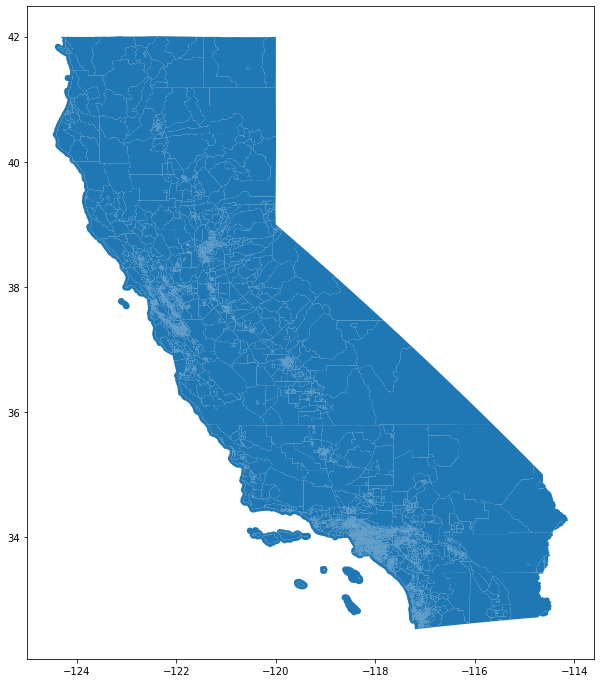

In [18]:
geodata.plot(figsize=(12,12))

Great! The dataframe contains many columns, but we only need two - GEOID and geometry. 

In [19]:
geodata=geodata[['GEOID', 'geometry']]

 Now to examine the dataframe again

In [20]:
geodata.shape

(8057, 2)

Much cleaner, with only two columns we need!

Let us now merge the two data sets. Notice the placement of the geodataframe and the dataframe. This is key to get a geospatial dataframe. If you were to put dataframe on left, you will end up with a pandas dataframe. Secondly, we removed the geometry column from the dataframe as two columns with same name create problmen for us when they are not the basis of the emrge. Let us now merge

In [21]:
alameda2011 = geodata.merge(g2011v2, on='GEOID')

In [22]:
alameda2011.shape

(361, 13)

Let us look how this new dataset looks like

In [23]:
alameda2011.head()

,GEOID,geometry,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,NAME
0,06001427200,"POLYGON ((-122.24255 37.76713, -122.24274 37.7...",4376,3710,1616,135,0,1702,97,8,152,666,"Census Tract 4272, Alameda County, California"
1,06001436200,"POLYGON ((-122.11752 37.66581, -122.11759 37.6...",3804,1608,583,684,0,62,147,0,132,2196,"Census Tract 4362, Alameda County, California"
2,06001427100,"POLYGON ((-122.23978 37.76608, -122.24013 37.7...",3480,3196,2464,114,0,381,0,20,217,284,"Census Tract 4271, Alameda County, California"
3,06001427800,"POLYGON ((-122.27563 37.77136, -122.27605 37.7...",4655,4038,2654,188,17,1018,0,0,161,617,"Census Tract 4278, Alameda County, California"
4,06001403300,"POLYGON ((-122.25960 37.79624, -122.25966 37.7...",4061,3884,1159,250,0,2376,0,0,99,177,"Census Tract 4033, Alameda County, California"


In [24]:
list(alameda2011)

['GEOID',
 'geometry',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'NAME']

Success! Now this new dataframe has both our variables for analysis along with a geospatial element - the geometry!

a quick check, can we plot this?

Now, before we can start with the actual analysis there is we should do something about the columns and the headers. They are too many and names are not revealing anything. Check below:

In [25]:
type(alameda2011)

geopandas.geodataframe.GeoDataFrame

Yes, the new dataframe is a geodataframe. Let us now do some manipulations. First, plot the dataset

<AxesSubplot:>

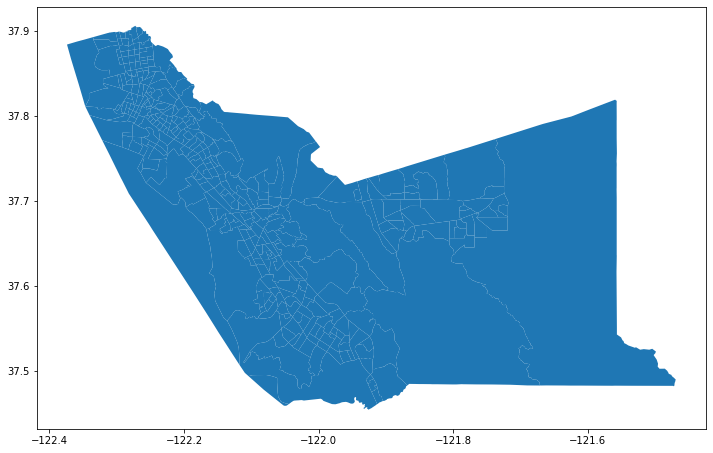

In [26]:
alameda2011.plot(figsize=(12,12))

In [27]:
alameda2011.head()

,GEOID,geometry,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,NAME
0,06001427200,"POLYGON ((-122.24255 37.76713, -122.24274 37.7...",4376,3710,1616,135,0,1702,97,8,152,666,"Census Tract 4272, Alameda County, California"
1,06001436200,"POLYGON ((-122.11752 37.66581, -122.11759 37.6...",3804,1608,583,684,0,62,147,0,132,2196,"Census Tract 4362, Alameda County, California"
2,06001427100,"POLYGON ((-122.23978 37.76608, -122.24013 37.7...",3480,3196,2464,114,0,381,0,20,217,284,"Census Tract 4271, Alameda County, California"
3,06001427800,"POLYGON ((-122.27563 37.77136, -122.27605 37.7...",4655,4038,2654,188,17,1018,0,0,161,617,"Census Tract 4278, Alameda County, California"
4,06001403300,"POLYGON ((-122.25960 37.79624, -122.25966 37.7...",4061,3884,1159,250,0,2376,0,0,99,177,"Census Tract 4033, Alameda County, California"


Now to check if our does any our rows have cells with null values

In [28]:
alameda2011.isna().sum()

GEOID                                                      0
geometry                                                   0
Total                                                      0
Non Hispanic                                               0
Non Hispanic White                                         0
Non Hispanic Black                                         0
Non Hispanic American Indian and Alaska Native             0
Non Hispanic Asian                                         0
Non Hispanic Native Hawaiian and Other Pacific Islander    0
Non Hispanic Some other race                               0
Non Hispanic Two or more races                             0
Hispanic                                                   0
NAME                                                       0
dtype: int64

The rows are good. Now the same check for columns

In [29]:
alameda2011.columns[alameda2011.isna().all()].tolist()

[]

Looks like the columns are all good! Now let us check values within a row to check if they add up to the total. We use the iloc command for this. First we generate a random track which we will use for the check.

In [30]:
random_tract = alameda2011.sample()
random_tract

,GEOID,geometry,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,NAME
284,06001405401,"POLYGON ((-122.24873 37.80007, -122.24848 37.7...",3823,2653,252,939,0,1311,10,28,113,1170,"Census Tract 4054.01, Alameda County, California"


We have our tract. let us check

In [31]:
if random_tract.iloc[0]['Total']==random_tract.iloc[0]['Non Hispanic']+random_tract.iloc[0]['Hispanic']:
    print("Values add")
else: 
    print("Values do not add")

Values do not add


Well, there is some problem with the data. Let us check the components individually

In [32]:
random_tract.iloc[0]['Total']


'3823'

That seems right. 

In [33]:
random_tract.iloc[0]['Non Hispanic'] + random_tract.iloc[0]['Hispanic']

'26531170'

Now, this has concatenated the two as if they are strings. let us check the data type

In [34]:
type(random_tract.iloc[0]['Non Hispanic'])

str

there you go. These should be numbers/float and not string. Let us check the data type of all columns. First let us create a new dataframe that contains the headers.

In [35]:
dtypes = list(alameda2011)

Now we let us examine the extent of the issue with a for loop 

In [36]:
for x in dtypes:
    print(x,type(alameda2011[x][0]))

GEOID <class 'str'>
geometry <class 'shapely.geometry.polygon.Polygon'>
Total <class 'str'>
Non Hispanic <class 'str'>
Non Hispanic White <class 'str'>
Non Hispanic Black <class 'str'>
Non Hispanic American Indian and Alaska Native <class 'str'>
Non Hispanic Asian <class 'str'>
Non Hispanic Native Hawaiian and Other Pacific Islander <class 'str'>
Non Hispanic Some other race <class 'str'>
Non Hispanic Two or more races <class 'str'>
Hispanic <class 'str'>
NAME <class 'str'>


First three, and the last columns have the correct data frame. all others need to be changed to float. We again create a new dataframe for the for loop with the problem columns. 

In [37]:
dtypes2 = ['Total', 
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic']

The neat forloop will now help us do the data type change. 

In [38]:
for x in dtypes2:
    alameda2011[x]=alameda2011[x].astype(float)

To examine if the changes works, we create a fresh random row. and redo the test from earlier. 

In [39]:
random_tract2 = alameda2011.sample()
random_tract2

,GEOID,geometry,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,NAME
260,06001426100,"POLYGON ((-122.23754 37.82198, -122.23742 37.8...",5959.0,5888.0,4590.0,55.0,0.0,1089.0,13.0,46.0,95.0,71.0,"Census Tract 4261, Alameda County, California"


In [40]:
if random_tract2.iloc[0]['Total']==random_tract2.iloc[0]['Non Hispanic']+random_tract2.iloc[0]['Hispanic']:
    print("Values add")
else:
    print("Values do not add")

Values add


Yes it does. Now let us go back to testing. 

In [41]:
alameda2011['Total'].head()

0    4376.0
1    3804.0
2    3480.0
3    4655.0
4    4061.0
Name: Total, dtype: float64

In [42]:
alameda2011['Non Hispanic'].head()

0    3710.0
1    1608.0
2    3196.0
3    4038.0
4    3884.0
Name: Non Hispanic, dtype: float64

In [43]:
for x in dtypes2:
    print( '\033[1m', "Summary for Column", x, '\033[0m')
    print(alameda2011[x].describe(), "\n")

 Summary for Column Total 
count     361.000000
mean     4140.930748
std      1535.961823
min         0.000000
25%      3090.000000
50%      4027.000000
75%      5118.000000
max      8602.000000
Name: Total, dtype: float64 

 Summary for Column Non Hispanic 
count     361.000000
mean     3220.977839
std      1326.298003
min         0.000000
25%      2250.000000
50%      3116.000000
75%      4038.000000
max      7639.000000
Name: Non Hispanic, dtype: float64 

 Summary for Column Non Hispanic White 
count     361.000000
mean     1433.650970
std      1026.817216
min         0.000000
25%       668.000000
50%      1244.000000
75%      2077.000000
max      5173.000000
Name: Non Hispanic White, dtype: float64 

 Summary for Column Non Hispanic Black 
count     361.000000
mean      506.445983
std       570.045162
min         0.000000
25%       106.000000
50%       310.000000
75%       684.000000
max      3177.000000
Name: Non Hispanic Black, dtype: float64 

 Summary for Column Non Hispanic A

Very neat. 
## Visual Representation

Let us plot histograms to understand the distribution visually.

<AxesSubplot:ylabel='Frequency'>

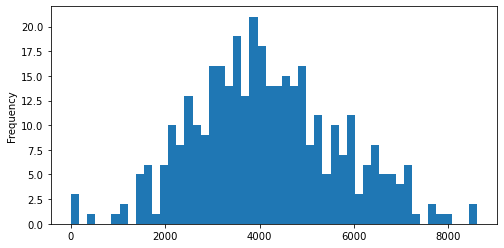

In [44]:
alameda2011['Total'].plot.hist(figsize=(8,4), bins=50)

<AxesSubplot:ylabel='Frequency'>

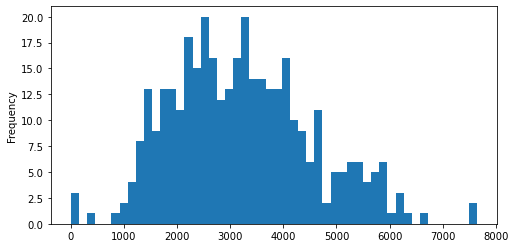

In [45]:
alameda2011['Non Hispanic'].plot.hist(figsize=(8,4), bins=50)

<AxesSubplot:ylabel='Frequency'>

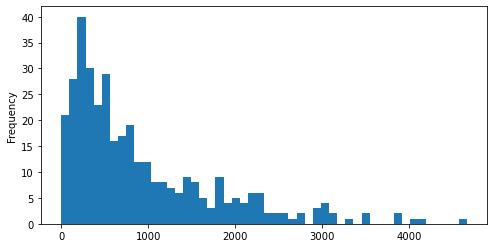

In [46]:
alameda2011['Hispanic'].plot.hist(figsize=(8,4), bins=50)

<AxesSubplot:ylabel='Frequency'>

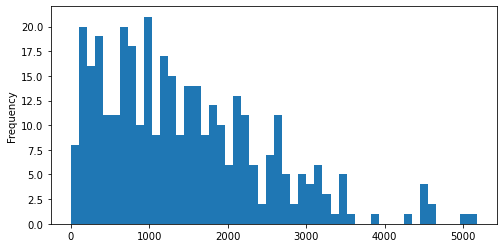

In [47]:
alameda2011['Non Hispanic White'].plot.hist(figsize=(8,4), bins=50)

<AxesSubplot:ylabel='Frequency'>

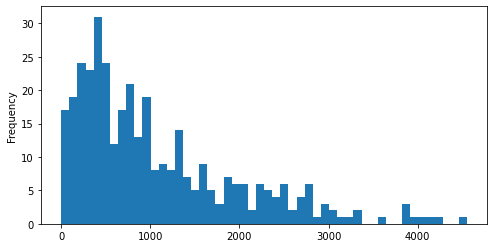

In [48]:
alameda2011['Non Hispanic Asian'].plot.hist(figsize=(8,4), bins=50)

<AxesSubplot:ylabel='Frequency'>

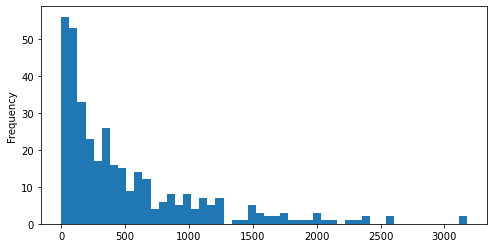

In [49]:
alameda2011['Non Hispanic Black'].plot.hist(figsize=(8,4), bins=50)

<AxesSubplot:ylabel='Frequency'>

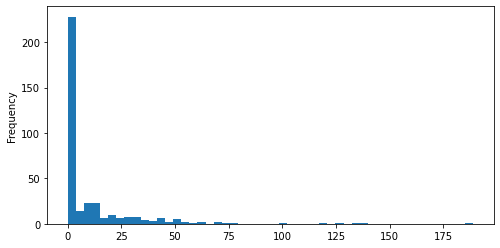

In [50]:
alameda2011['Non Hispanic American Indian and Alaska Native'].plot.hist(figsize=(8,4), bins=50)

Curious graphs. We are here to map these. 

## Mapping
Let us create a map of first 5 census tracts. 

<AxesSubplot:>

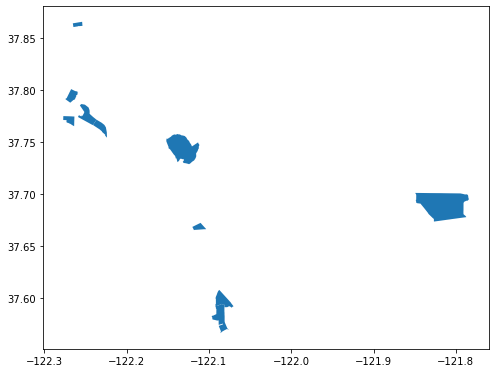

In [51]:
alameda2011.head(10).plot(figsize=(8,8))

These maps do not tell us anything. Let us now look at 5 of the least populus counties. 

In [52]:
alameda2011_ace = alameda2011.sort_values(by='Total',ascending = True)

<AxesSubplot:>

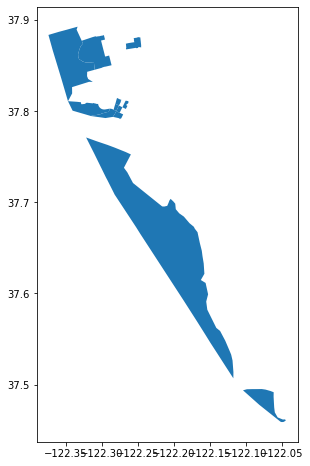

In [53]:
alameda2011_ace.head(10).plot(figsize=(8,8))

Same 5 counties but in a cholopath map that shows the relative differencies in population.

<AxesSubplot:>

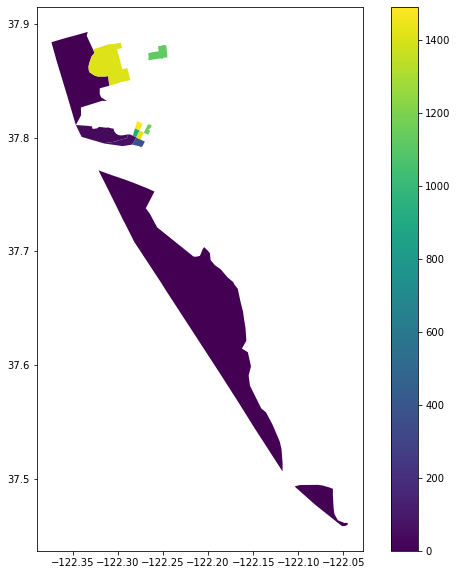

In [54]:
alameda2011_ace.head(10).plot(figsize=(10,10),
                          column='Total',
                          legend=True)

Let us now look at 5 of the most populus counties. 

In [55]:
alameda2011_dec = alameda2011.sort_values(by='Total',ascending = False)

<AxesSubplot:>

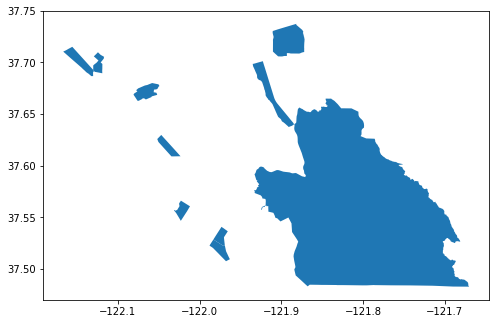

In [56]:
alameda2011_dec.head(10).plot(figsize=(8,8))

<AxesSubplot:>

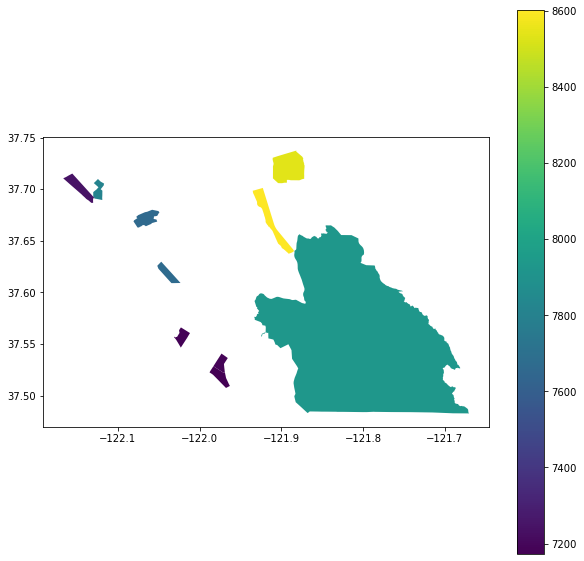

In [57]:
alameda2011_dec.head(10).plot(figsize=(10,10),
                          column='Total',
                          legend=True)

Inorder to perform better analysis, we need to convert absolute numbers into percentages. 

In [58]:
for x in dtypes2:
    alameda2011[("Percent " + x)] = alameda2011[x]/alameda2011['Total']*100
    print(x, "Completed")

Total Completed
Non Hispanic Completed
Non Hispanic White Completed
Non Hispanic Black Completed
Non Hispanic American Indian and Alaska Native Completed
Non Hispanic Asian Completed
Non Hispanic Native Hawaiian and Other Pacific Islander Completed
Non Hispanic Some other race Completed
Non Hispanic Two or more races Completed
Hispanic Completed


Checking if all the new columns are there in the dataframe

In [59]:
list(alameda2011)

['GEOID',
 'geometry',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'NAME',
 'Percent Total',
 'Percent Non Hispanic',
 'Percent Non Hispanic White',
 'Percent Non Hispanic Black',
 'Percent Non Hispanic American Indian and Alaska Native',
 'Percent Non Hispanic Asian',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Percent Non Hispanic Some other race',
 'Percent Non Hispanic Two or more races',
 'Percent Hispanic']

In [60]:
dtypes3=['Percent Non Hispanic',
 'Percent Non Hispanic White',
 'Percent Non Hispanic Black',
 'Percent Non Hispanic American Indian and Alaska Native',
 'Percent Non Hispanic Asian',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Percent Non Hispanic Some other race',
 'Percent Non Hispanic Two or more races',
 'Percent Hispanic']

Now let us graph each of the variable

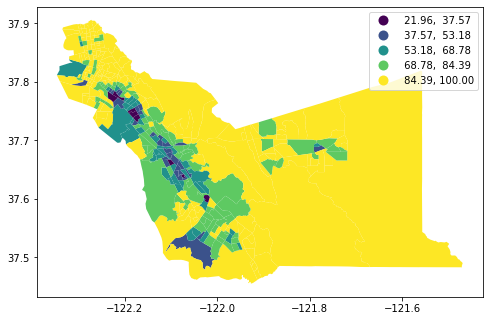

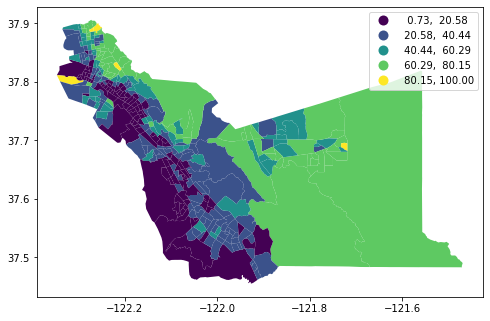

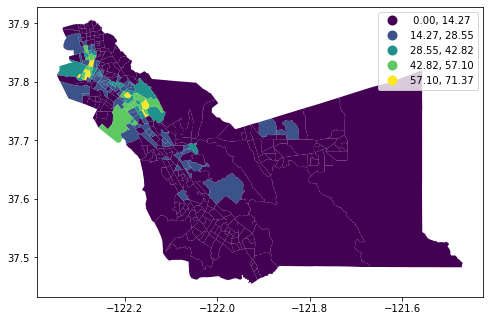

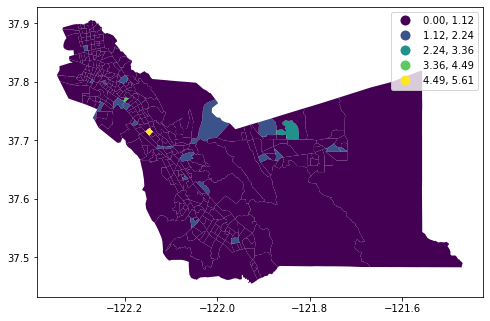

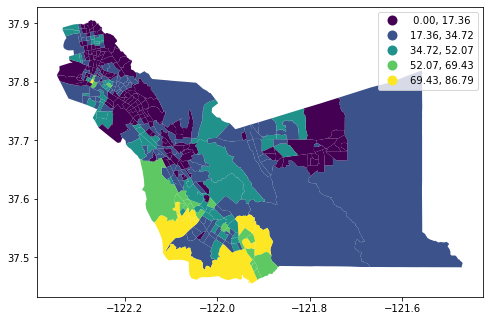

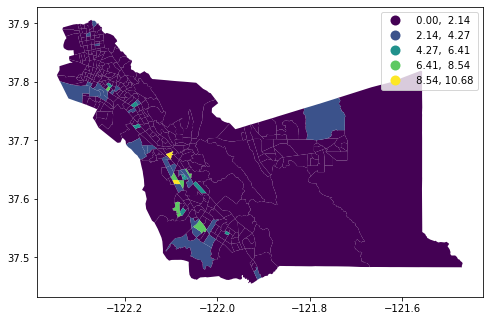

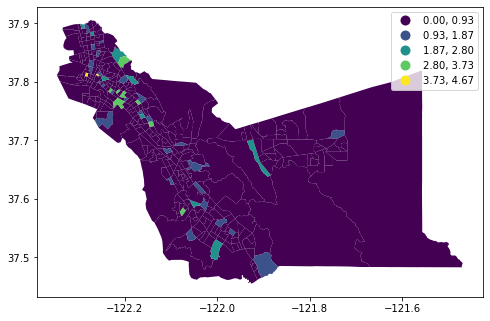

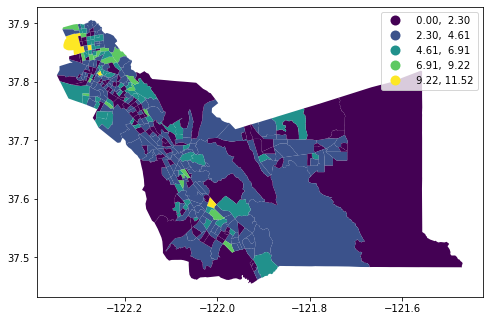

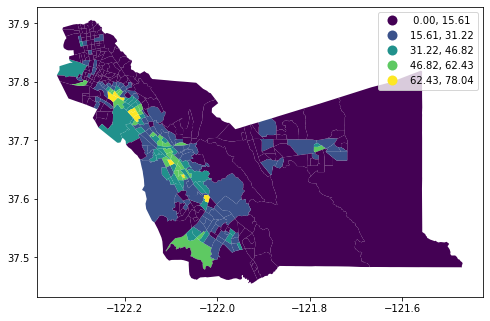

In [61]:
for x in dtypes3:
    alameda2011.plot(figsize=(8,8),
                 column=x,
                 legend=True, 
                 scheme='equal_interval')


One of the graphs, with a differetn colour scheme.

<AxesSubplot:>

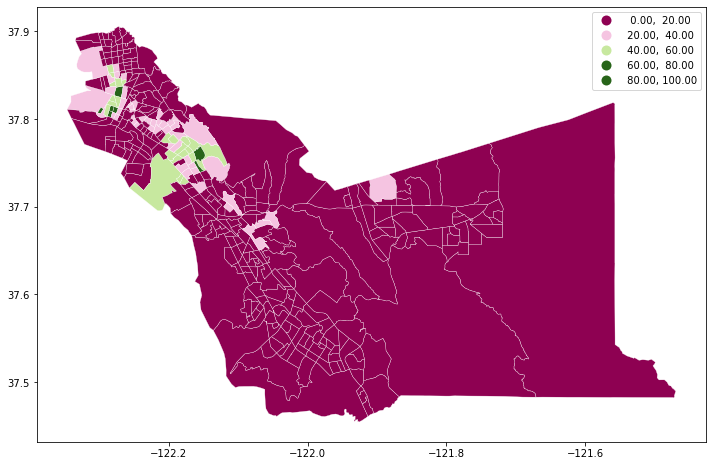

In [62]:
alameda2011.plot(figsize=(12,12),
            column='Percent Non Hispanic Black', 
            cmap='PiYG', 
            scheme='user_defined', 
            classification_kwds={'bins':[20,40,60,80,100]}, 
            edgecolor='white', 
            linewidth=0.3, 
            legend=True
            )

Comparitive graphs, for us to see the situation better

Text(0.5, 1.0, 'Percent Non Hispanic Black')

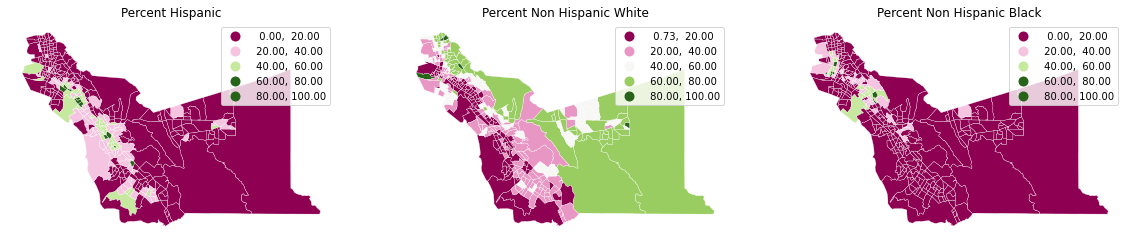

In [63]:
fig, axs = plt.subplots(1, 3, figsize=(20, 15), sharex=True, sharey=True)
ax1, ax2, ax3 = axs
alameda2011.plot(column='Percent Hispanic', 
            cmap='PiYG', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0.3, 
            ax=ax1, 
            legend=True
           )
ax1.axis("off")
ax1.set_title("Percent Hispanic")

alameda2011.plot(column='Percent Non Hispanic White', 
            cmap='PiYG', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0.3, 
            ax=ax2, 
            legend=True
           )
ax2.axis("off")
ax2.set_title("Percent Non Hispanic White")

alameda2011.plot(column='Percent Non Hispanic Black', 
            cmap='PiYG', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0.3, 
            ax=ax3, 
            legend=True
           )
ax3.axis("off")
ax3.set_title("Percent Non Hispanic Black")

We can see patterns in distribution of population. White residents are more likely to reside to the east to the county while hispanic and black residents lived to the west. 

Now can we filter the data and look at counties that have a majority black population? 

<AxesSubplot:>

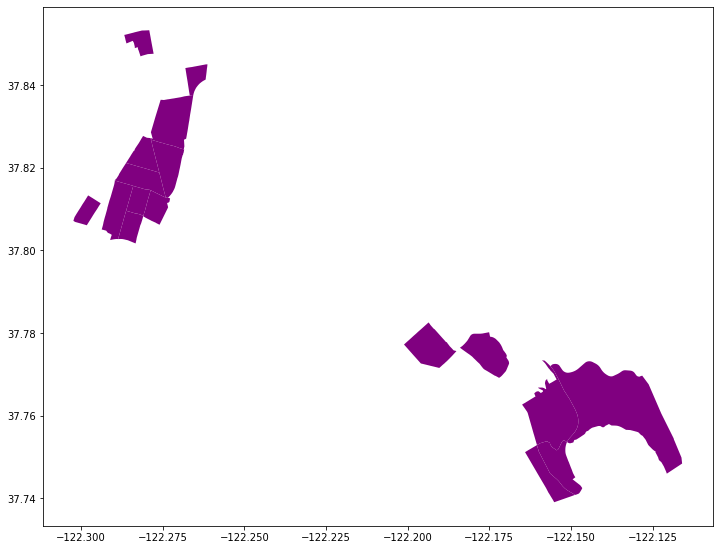

In [64]:
alameda2011[alameda2011['Percent Non Hispanic Black'] > 50] 
alameda2011[alameda2011['Percent Non Hispanic Black'] > 50].plot(figsize=(12,10),color="purple")

The map is telling something, but without a overlay map, we cannot understand it.

In [65]:
alameda2011_web_mercator = alameda2011.to_crs(epsg=3857)

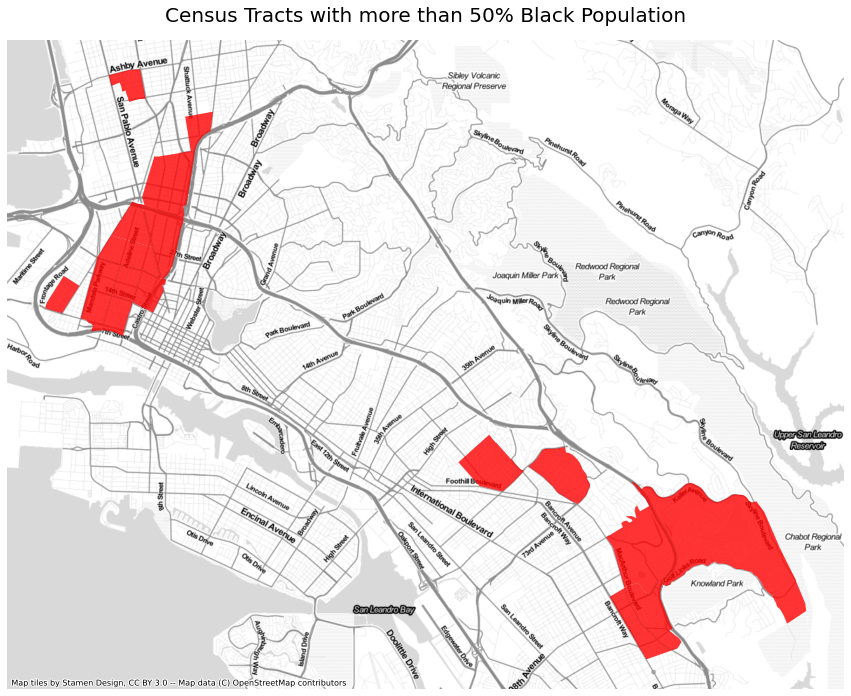

In [66]:
fig, ax = plt.subplots(figsize=(15, 15))
alameda2011_web_mercator[alameda2011_web_mercator['Percent Non Hispanic Black'] > 50].plot(
                                                               ax=ax, 
                                                               color="red",
                                                               alpha=0.8
)
ax.axis('off')
ax.set_title('Census Tracts with more than 50% Black Population',fontsize=20,pad=18)
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

This maps gives us a better picture of the counties where black residents form the majority.

In [67]:
alameda2011.to_file("alameda2011.geojson", driver='GeoJSON')